In [1]:
import pandas as pd
import numpy as np

rawData = pd.read_csv("heartData.csv")

data = pd.DataFrame(rawData)

C:\Users\ermun\AppData\Local\Temp\ipykernel_35612\1381627929.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Creating dummy variables for `chest pain type`, `resting ecg`, and `ST slope` because they are all nominal variables. Below is the description for what each value the variable can take means...

Chest Pain type: 
    --1 : typical angina
    --2 : atypical angina
    --3 : non-anginal pain
    --4 : asymptomatic

Resting Electrocardiogram results:
    --0 : normal
    --1 : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    --2 : showing probable or definite left ventricular hypertrophy by Estes' criteria

Slope of peak exercise ST segment:
    --1 : Upsloping
    --2 : Flat
    --3 : Downsloping

In [2]:
#Created dummy variables for the variables with a nominal variable type. 
data = pd.get_dummies(data, columns= ["chest pain type", "resting ecg", "ST slope"])
data

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_0,resting ecg_1,resting ecg_2,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,True,False,False,False,True,False,False
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,True,False,False,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,True,False,False,True,False,False
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,True,False,False,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,110,264,0,132,0,1.2,1,True,False,False,False,True,False,False,False,False,True,False
1186,68,1,144,193,1,141,0,3.4,1,False,False,False,True,True,False,False,False,False,True,False
1187,57,1,130,131,0,115,1,1.2,1,False,False,False,True,True,False,False,False,False,True,False
1188,57,0,130,236,0,174,0,0.0,1,False,True,False,False,False,False,True,False,False,True,False


Looking at distributions of some of the variables including; age, cholesterol, resting bps, and max heart rate.

Text(0.5, 1.0, 'Max Heart Rate Distribution')

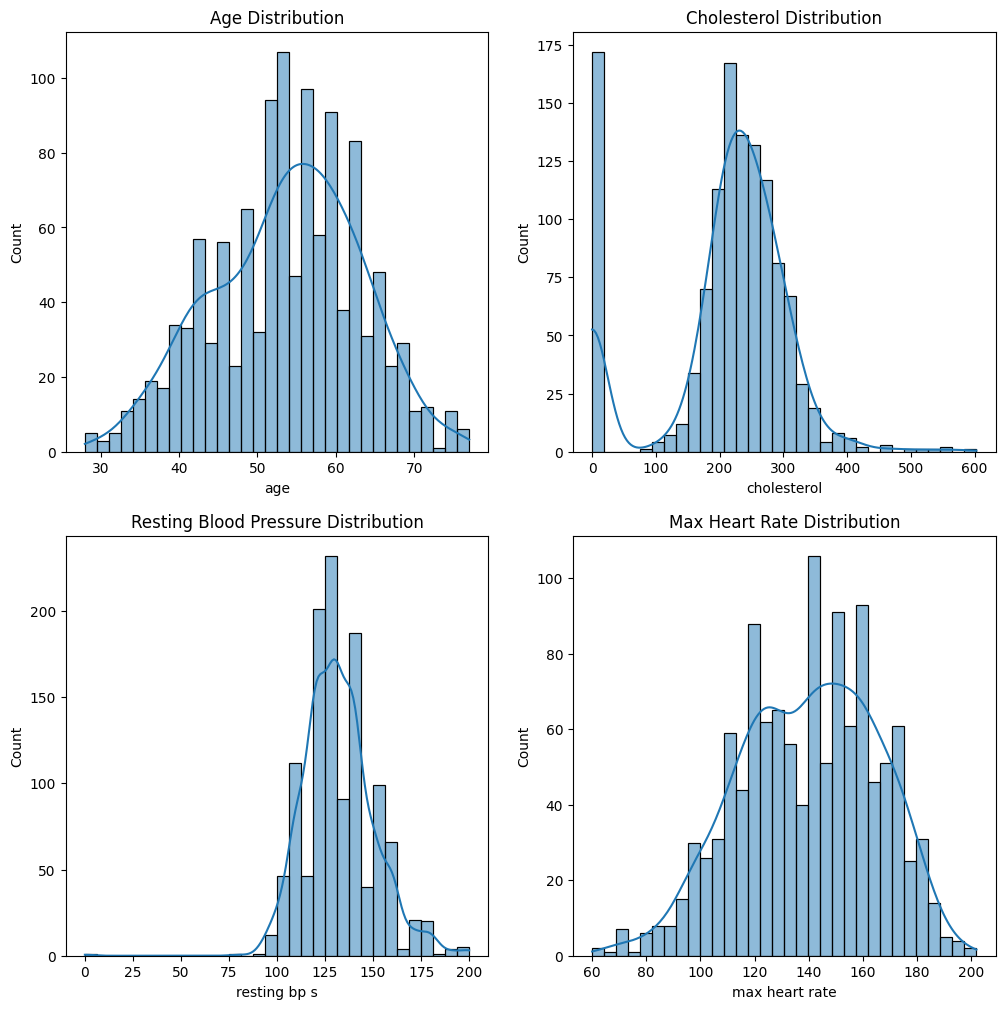

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,12))
plt.subplot(2, 2, 1)
sns.histplot(data['age'].dropna(), bins=32, kde=True)
plt.title('Age Distribution')
plt.subplot(2, 2, 2)
sns.histplot(data['cholesterol'].dropna(), bins=32, kde=True)
plt.title('Cholesterol Distribution')
plt.subplot(2, 2, 3)
sns.histplot(data['resting bp s'].dropna(), bins=32, kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.subplot(2, 2, 4)
sns.histplot(data['max heart rate'].dropna(), bins=32, kde=True)
plt.title('Max Heart Rate Distribution')


We can see that each of these variables seem to be normally distributed. However the one thing that stands out in the cholesterol distribution is how many observations there are at `0 mg/dL', which according to the University of Rochester is extremely bad. They say that anything below 70 mg/dL is concerning, and is a sign that you are at high risk for a heart attack, or you have already had a heart attack.

We can take a look at the means and proportions of men and women in the study as well.

In [4]:
menProp = data['sex'].value_counts(normalize=True)[1]
womenProp = data['sex'].value_counts(normalize=True)[0]

meanAge = data['age'].mean()
meanChol = data['cholesterol'].dropna().mean()
meanBP = data['resting bp s'].mean()
meanHR = data['max heart rate'].mean()

print(' Proportion of men:', menProp, '\n', 
      'Proportion of women:', womenProp, '\n',
      'Mean Age:', meanAge, '\n', 
      'Mean Cholesterol:', meanChol, '\n', 
      'Mean Resting Blood Pressure:', meanBP, '\n',
      'Mean Max Heart Rate:', meanHR )

 Proportion of men: 0.7638655462184873 
 Proportion of women: 0.2361344537815126 
 Mean Age: 53.72016806722689 
 Mean Cholesterol: 210.36386554621848 
 Mean Resting Blood Pressure: 132.15378151260504 
 Mean Max Heart Rate: 139.7327731092437


<function matplotlib.pyplot.show(close=None, block=None)>

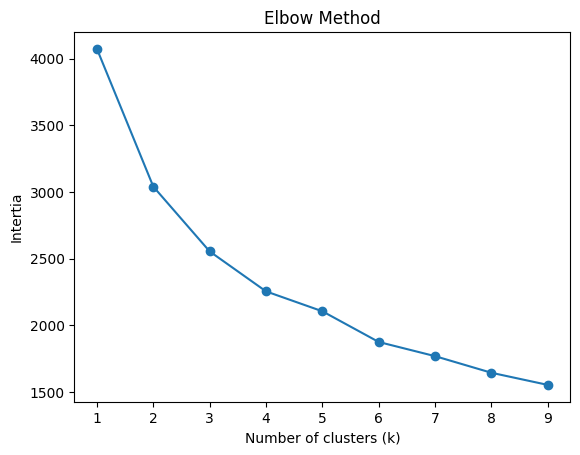

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = data[data['cholesterol'] != 0]

features = ['resting bp s', 'cholesterol', 'max heart rate', 'age']
scaler = StandardScaler()
X = data[features].dropna()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)


inertias = []
kRange = range(1,10)

for i in kRange:
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(kRange, inertias, marker= 'o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show

The following code completes the actual Kmeans++ clustering with 4 clusters which was found above. It then adds the labels to the data so I can then plot the clusters to get a better look at them. 

In [6]:
k = 4
kmeans = KMeans(n_clusters = k, init='k-means++', random_state=0)
kmeans.fit(X_scaled)
labelsKMeans = kmeans.labels_

data['kMeans_Labels'] = labelsKMeans

C:\Users\ermun\AppData\Local\Temp\ipykernel_35612\2082149164.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kMeans_Labels'] = labelsKMeans


Clustering Comparing Age and Resting Blood Pressure

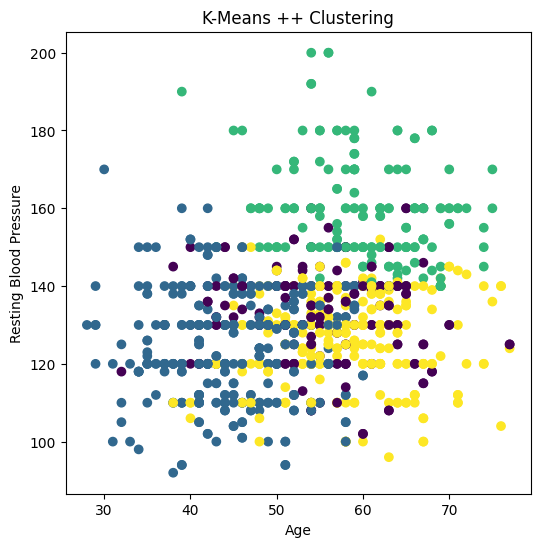

In [7]:
plt.figure(figsize= (6, 6))
plt.scatter(data['age'], data['resting bp s'], c=data['kMeans_Labels'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('K-Means ++ Clustering')
plt.show()

In [56]:
avgRest = data.groupby("kMeans_Labels")["resting bp s"].mean()
print(avgRest)
avgAge = data.groupby("kMeans_Labels")["age"].mean()
print(avgAge)

kMeans_Labels
0    132.803468
1    124.854839
2    159.114943
3    126.591973
Name: resting bp s, dtype: float64
kMeans_Labels
0    55.919075
1    45.443548
2    59.844828
3    57.732441
Name: age, dtype: float64


Clustering showing relationship between Age and Cholesterol

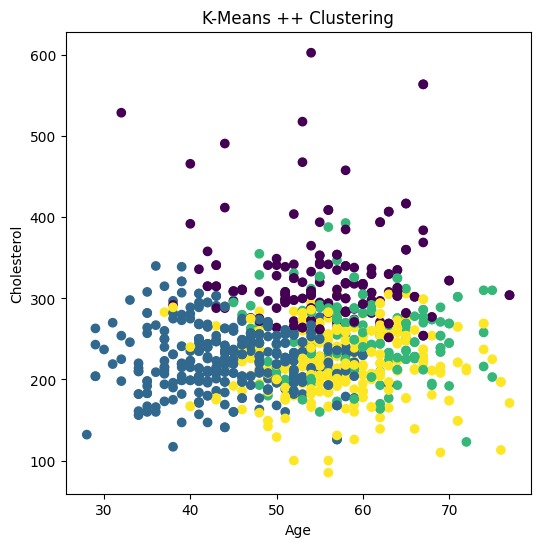

In [9]:
plt.figure(figsize= (6, 6))
plt.scatter(data['age'], data['cholesterol'], c=data['kMeans_Labels'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('K-Means ++ Clustering')
plt.show()

In [58]:
avgChol = data.groupby("kMeans_Labels")["cholesterol"].mean()
print(avgChol, avgAge)


kMeans_Labels
0    323.676301
1    226.680108
2    250.931034
3    221.906355
Name: cholesterol, dtype: float64 kMeans_Labels
0    55.919075
1    45.443548
2    59.844828
3    57.732441
Name: age, dtype: float64


Clustering showing the relationship between Age and Max Heart Rate

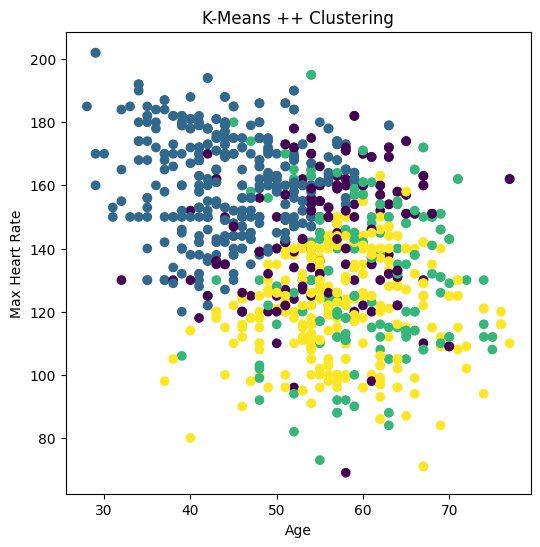

In [10]:
plt.figure(figsize= (6, 6))
plt.scatter(data['age'], data['max heart rate'], c=data['kMeans_Labels'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('K-Means ++ Clustering')
plt.show()

In [59]:
avgMax = data.groupby("kMeans_Labels")["max heart rate"].mean()
print(avgMax)


kMeans_Labels
0    146.809249
1    161.774194
2    133.413793
3    122.100334
Name: max heart rate, dtype: float64


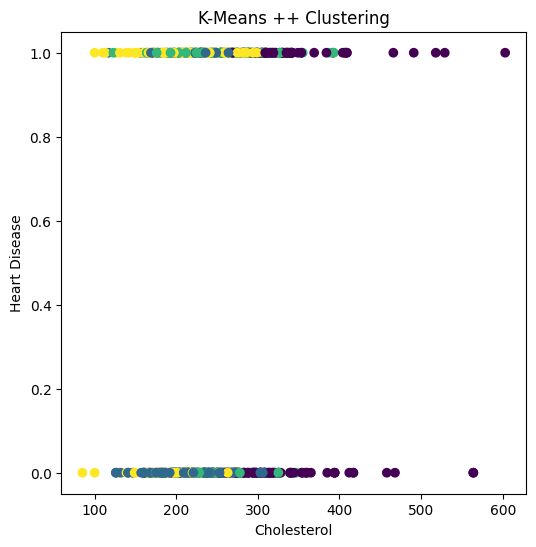

In [11]:
plt.figure(figsize= (6, 6))
plt.scatter(data['cholesterol'], data['target'], c=data['kMeans_Labels'], cmap='viridis')
plt.xlabel('Cholesterol')
plt.ylabel('Heart Disease')
plt.title('K-Means ++ Clustering')
plt.show()

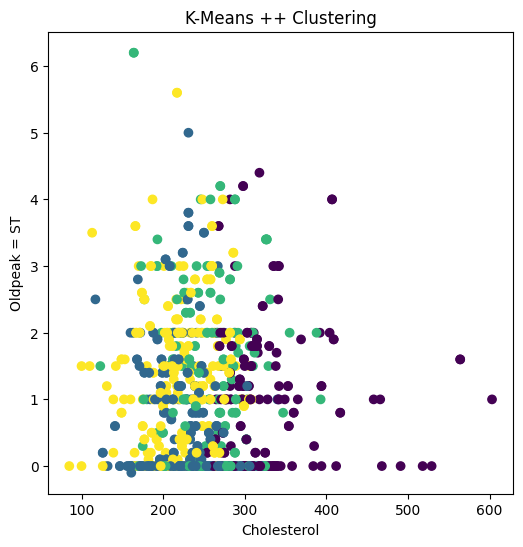

In [12]:
plt.figure(figsize= (6, 6))
plt.scatter(data['cholesterol'], data['oldpeak'], c=data['kMeans_Labels'], cmap='viridis')
plt.xlabel('Cholesterol')
plt.ylabel('Oldpeak = ST')
plt.title('K-Means ++ Clustering')
plt.show()

In [11]:
clusterHeartDiseaseProportions = data.groupby(['kMeans_Labels', 'target'])['target'].count() / data.groupby('kMeans_Labels')['target'].count()
proportionHeartDisease_1 = clusterHeartDiseaseProportions.loc[:, 1]
print(proportionHeartDisease_1)

kMeans_Labels
0    0.508671
1    0.231183
2    0.660920
3    0.628763
Name: target, dtype: float64


This is where I am going to implement my logistic regression to see which variables effect whether you have heart disease or not. I will use k-fold cross-validation to pick the best logistic regression, and then use the coefficients on the log odds function to see which variables are weighed the most. 

In [6]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.DataFrame(rawData)
data = pd.get_dummies(data, columns= ["chest pain type", "resting ecg", "ST slope"])

logReg1 = LogisticRegression()

def k_fold_cv(model, X, y, k):
    kf = KFold(n_splits=k, random_state=10, shuffle=True)
    accuracies = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    return accuracies

noTarget1 = data.drop(['target', 'chest pain type_1', 
'chest pain type_2', 'chest pain type_3', 'chest pain type_4', 'resting ecg_0', 'resting ecg_1', 'resting ecg_2', 
'ST slope_0', 'ST slope_1', 'ST slope_2', 'ST slope_3'], axis= 1)
scaledData1 = scaler.fit_transform(noTarget1)
scaledData1 = pd.DataFrame(scaledData1, columns= ['age', 'sex', 'resting bp s', 'cholesterol', 
'fasting blood sugar', 'max heart rate', 'exercise angina', 'oldpeak'])
L = scaledData1
r = data['target']

noTarget2 = data.drop(['target'], axis= 1)
scaledData2 = scaler.fit_transform(noTarget2)
scaledData2 = pd.DataFrame(scaledData2, columns= ['age', 'sex', 'resting bp s', 'cholesterol', 
'fasting blood sugar', 'max heart rate', 'exercise angina', 'oldpeak', 'chest pain type_1', 
'chest pain type_2', 'chest pain type_3', 'chest pain type_4', 'resting ecg_0', 'resting ecg_1', 'resting ecg_2', 
'ST slope_0', 'ST slope_1', 'ST slope_2', 'ST slope_3'])
L2 = scaledData2
r2 = data['target']


logAccuracies1 = k_fold_cv(logReg1, L.values, r, k = 10)
print("Logistic Regression 1 Accuracy:", np.mean(logAccuracies1), '\n')
logAccuracies2 = k_fold_cv(logReg1, L2.values, r2, k = 10)
print("Logistic Regression 2 Accuracy:", np.mean(logAccuracies2),'\n')

logResults = logReg1.fit(L, r)
coefficients1 = logResults.coef_

print("Coefficients for Logistic Regression 1:", '\n',
      "Age:", coefficients1[0][0], '\n',
      "Sex:", coefficients1[0][1], '\n',
      "Resting Blood Pressure:", coefficients1[0][2], '\n',
      "Cholesterol:", coefficients1[0][3], '\n',
      "Fasting Blood Sugar:", coefficients1[0][4], '\n',
      "Max Heart Rate:", coefficients1[0][5], '\n', 
      "Exercise Angina:", coefficients1[0][6], '\n',
      "Oldpeak:", coefficients1[0][7], '\n' 
      )

logResults2 = logReg1.fit(L2, r2)
coefficients2 = logResults2.coef_
print("Coefficients for Logistic Regression 2:", '\n',
      "Age:", coefficients2[0][0], '\n',
      "Sex:", coefficients2[0][1], '\n',
      "Resting Blood Pressure:", coefficients2[0][2], '\n',
      "Cholesterol:", coefficients2[0][3], '\n',
      "Fasting Blood Sugar:", coefficients2[0][4], '\n',
      "Max Heart Rate:", coefficients2[0][5], '\n', 
      "Exercise Angina:", coefficients2[0][6], '\n',
      "Oldpeak:", coefficients2[0][7], 
      )

Logistic Regression 1 Accuracy: 0.8033613445378152 

Logistic Regression 2 Accuracy: 0.846218487394958 

Coefficients for Logistic Regression 1: 
 Age: 0.16933857119567802 
 Sex: 0.5191619923976326 
 Resting Blood Pressure: 0.036206978186115964 
 Cholesterol: -0.2802334928553517 
 Fasting Blood Sugar: 0.3674143255509972 
 Max Heart Rate: -0.5180450047799993 
 Exercise Angina: 0.7589122603650839 
 Oldpeak: 0.7359082167009158 

Coefficients for Logistic Regression 2: 
 Age: 0.16407623137975752 
 Sex: 0.6545488245523906 
 Resting Blood Pressure: 0.12747892472459188 
 Cholesterol: -0.35130982066744026 
 Fasting Blood Sugar: 0.36326333489099777 
 Max Heart Rate: -0.17459383294490408 
 Exercise Angina: 0.4149149989184606 
 Oldpeak: 0.4428267392969722


This is where I will create a decision tree. This will help me get a better feel for the relationship between the variables them selved, due to how the tree will create splits based on the interactions between the different variables I give it. 

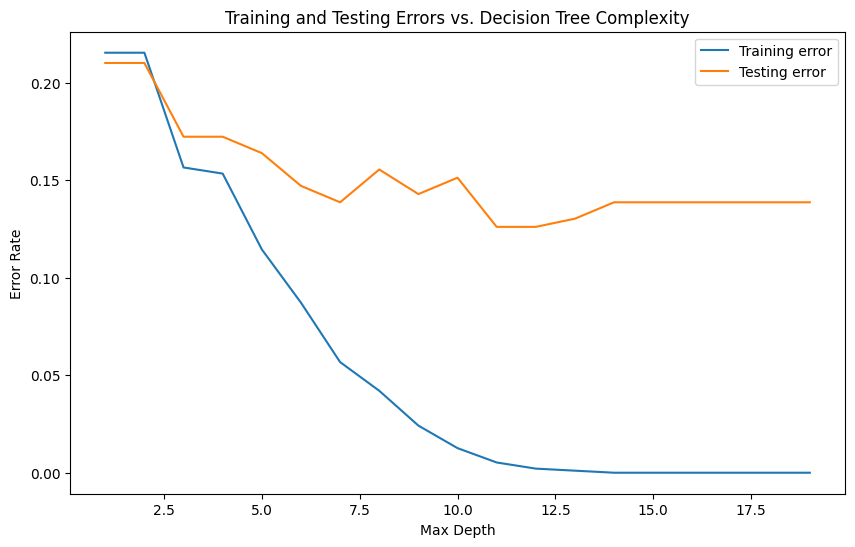

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(L2, r2, test_size=0.2, random_state=20)

trainErrors = []
testErrors = []

maxDepthRange = range(1,20)

for max_depth in maxDepthRange:
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=20)
    tree.fit(X_train, y_train)

    y_train_pred = tree.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    trainErrors.append(1 - train_accuracy)

    y_test_pred = tree.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    testErrors.append(1 - test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(maxDepthRange, trainErrors, label="Training error")
plt.plot(maxDepthRange, testErrors, label="Testing error")
plt.xlabel("Max Depth")
plt.ylabel("Error Rate")
plt.title("Training and Testing Errors vs. Decision Tree Complexity")
plt.legend()
plt.show()

The following will find the best parameters to use for a decision tree. 

In [36]:
clf = DecisionTreeClassifier(random_state=10)
accuracy = k_fold_cv(clf,  L2.values, r2, k=10)

paramGrid = {'max_depth': list(range(1, 20)), 'ccp_alpha' : [0.0, 0.001, 0.005, 0.01, 0.05]}
gridSearch = GridSearchCV(clf, paramGrid, cv=10,  scoring='accuracy', n_jobs=-1)
gridSearch.fit(L2, r2)
print(f"\nHyperparameter Tuning:")
print(f"Best max_depth: {gridSearch.best_params_['max_depth']}")
print(f"Optimal_CCP: {gridSearch.best_params_['ccp_alpha']}")
print(f"Best mean accuracy: {gridSearch.best_score_:.4f}")
bestParams = gridSearch.best_params_


Hyperparameter Tuning:
Best max_depth: 17
Optimal_CCP: 0.0
Best mean accuracy: 0.9042


[Text(0.520488202811245, 0.9722222222222222, 'ST slope_1 <= 0.117\ngini = 0.498\nsamples = 1190\nvalue = [561, 629]\nclass = No Heart Disease'),
 Text(0.27943022088353414, 0.9166666666666666, 'chest pain type_4 <= -0.05\ngini = 0.341\nsamples = 664\nvalue = [145, 519]\nclass = No Heart Disease'),
 Text(0.11157128514056225, 0.8611111111111112, 'sex <= -0.621\ngini = 0.494\nsamples = 218\nvalue = [97, 121]\nclass = No Heart Disease'),
 Text(0.0321285140562249, 0.8055555555555556, 'max heart rate <= -1.087\ngini = 0.315\nsamples = 51\nvalue = [41, 10]\nclass = Has Heart Disease'),
 Text(0.01606425702811245, 0.75, 'chest pain type_1 <= 1.942\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = No Heart Disease'),
 Text(0.008032128514056224, 0.6944444444444444, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = No Heart Disease'),
 Text(0.024096385542168676, 0.6944444444444444, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Has Heart Disease'),
 Text(0.04819277108433735, 0.75, 'fasting bloo

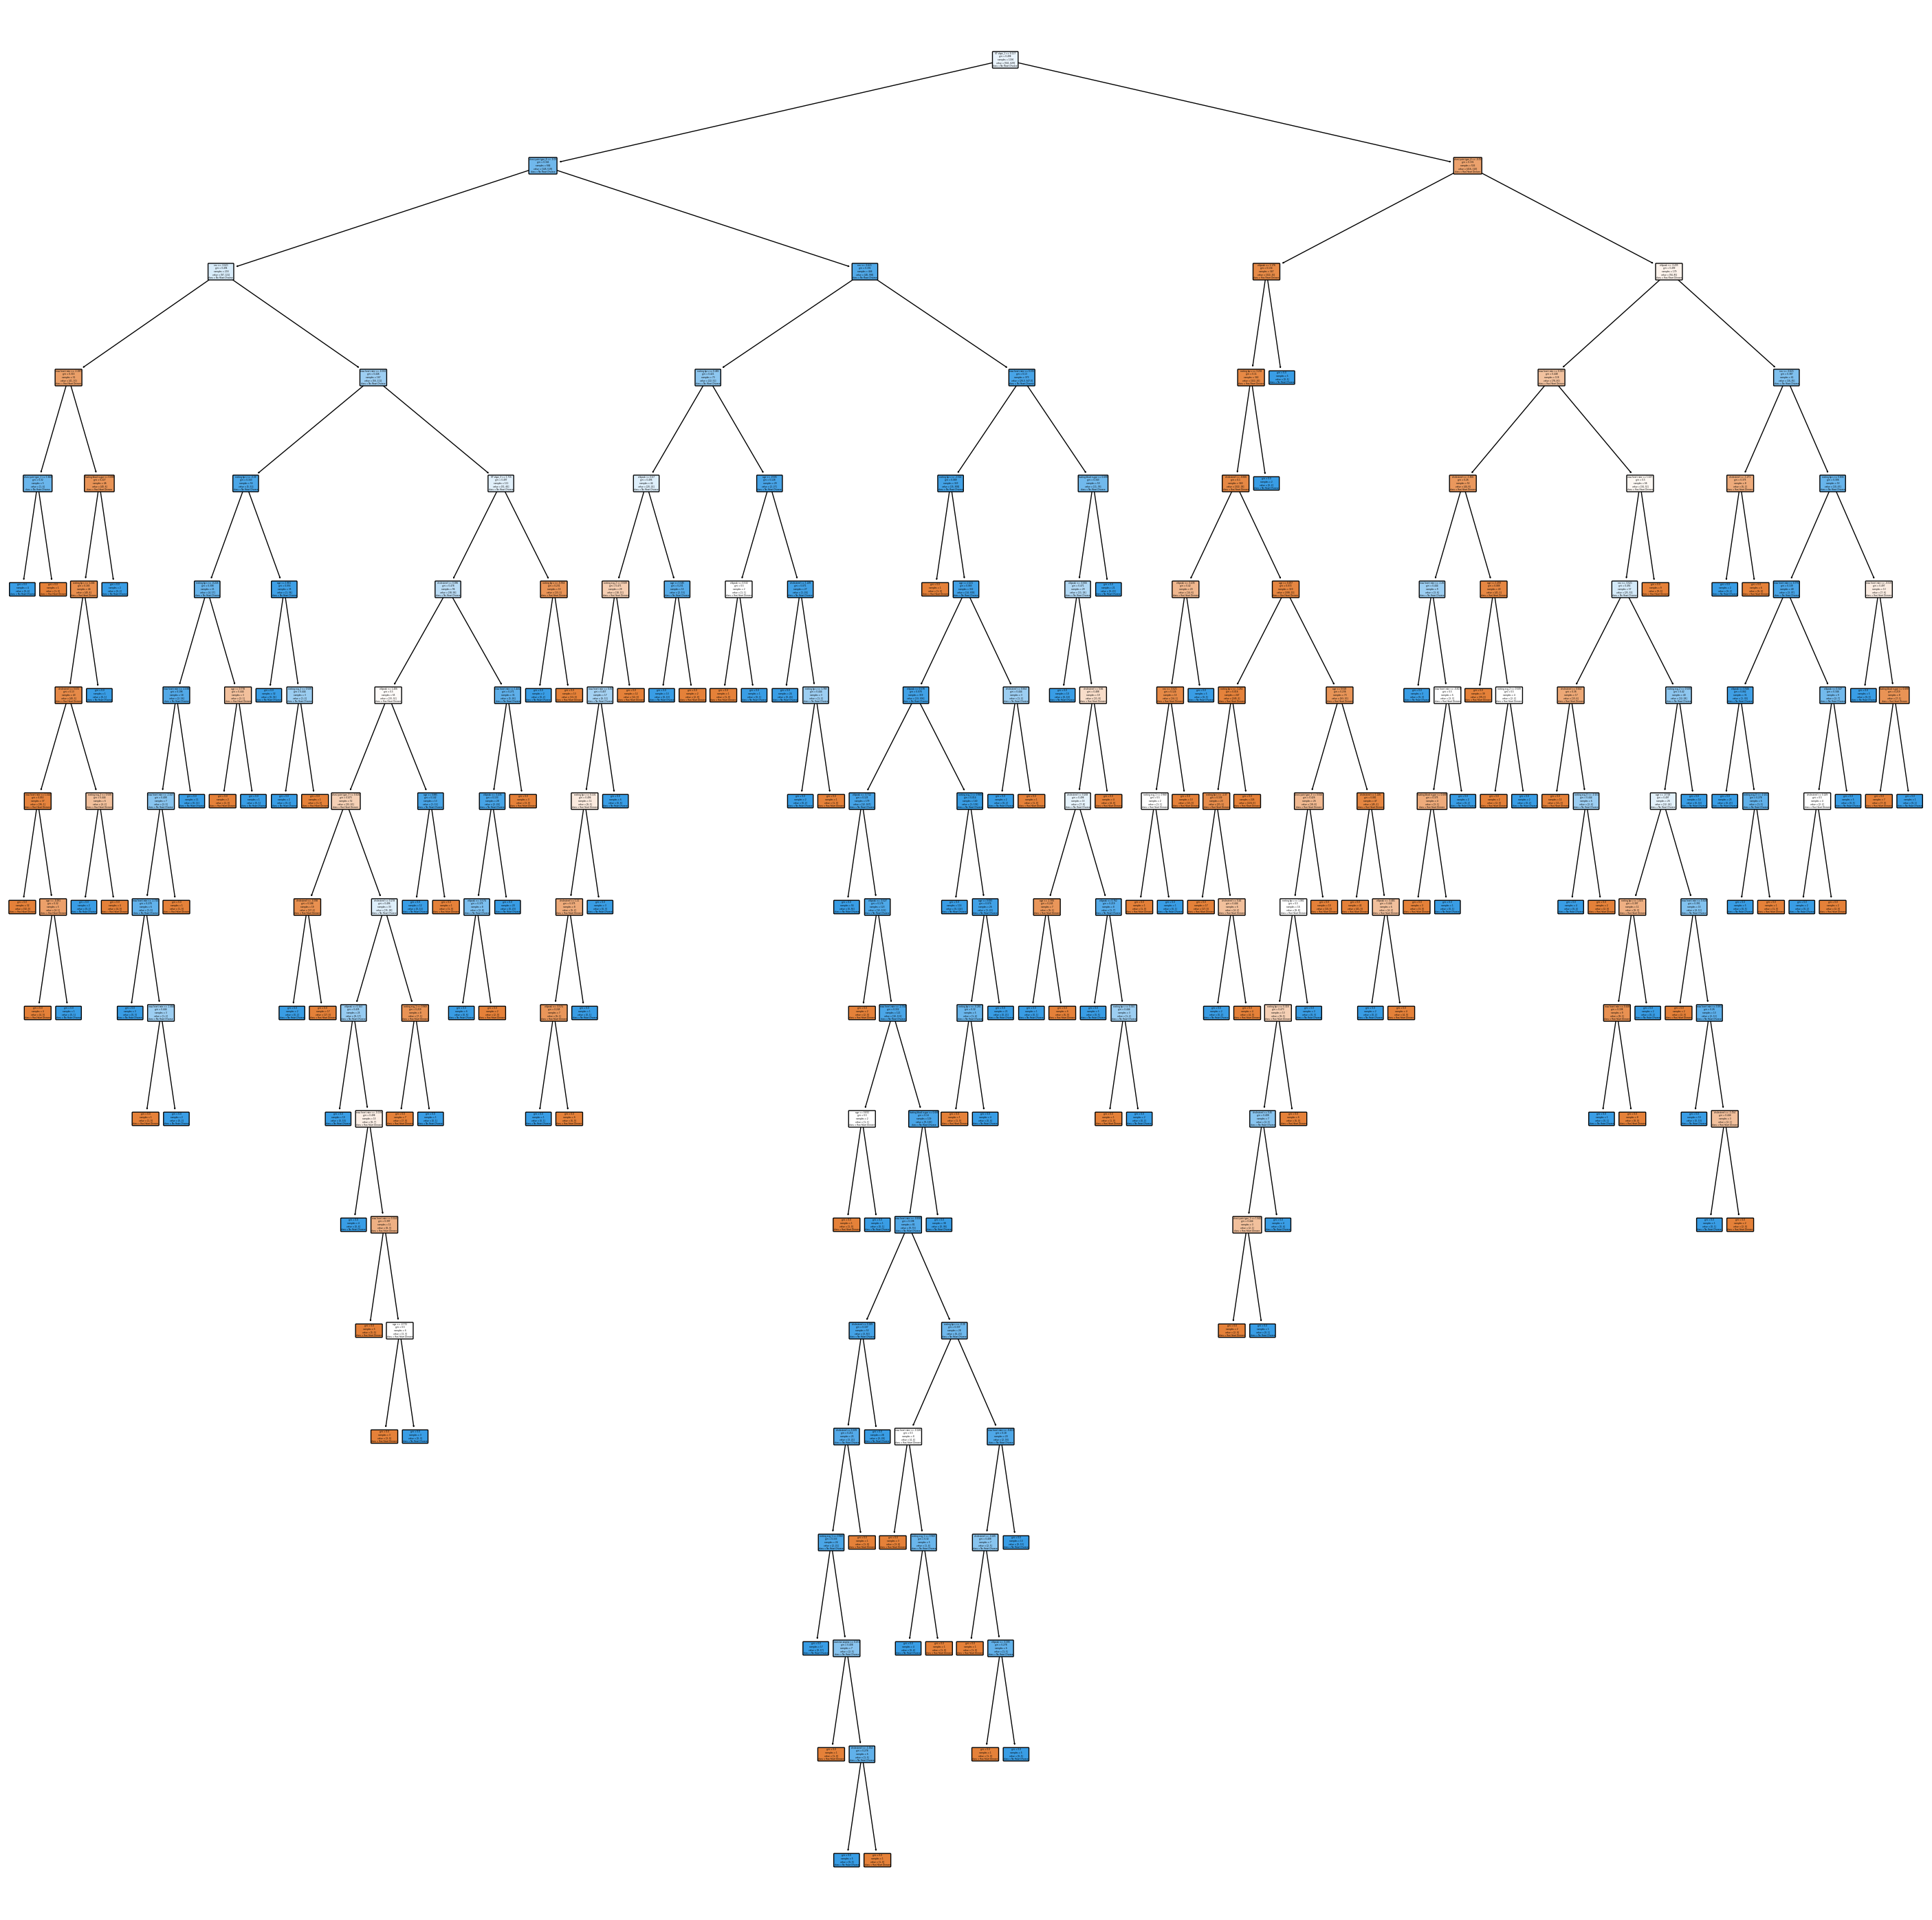

In [39]:
dt = DecisionTreeClassifier(**bestParams)
dt.fit(L2, r2)
plt.figure(figsize=(36,36))
plot_tree(dt, filled=True, feature_names=L2.columns, class_names=["Has Heart Disease","No Heart Disease"], rounded=True)